# Music Genre Classification task with neural networks from the PyTorch library.

The GTZAN dataset is a commonly used collection of audio tracks for research in music genre classification tasks. This dataset is widely utilized in the machine learning and audio processing communities for benchmarking algorithms and models.

## Overview

Number of Tracks: 1000\
Duration per Track: 30 seconds\
Genres: 10 (blues, classical, country, disco, hip-hop, jazz, metal, pop, reggae, rock)\
Tracks per Genre: 100

In [47]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim

In [48]:
data = pd.read_csv('./datasets/genre-dataset/features_30_sec.csv')

In [49]:
data.head(5)

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [50]:
# Extract features and labels
features = data.drop(columns=['filename', 'label','length'])
labels = data['label']

In [51]:
# Convert to NumPy arrays
X = features.to_numpy()
y = labels.to_numpy()

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [52]:
# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create TensorDataset
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [54]:
# Define the model
class MusicGenreClassifier(nn.Module):
    def __init__(self, input_size, num_classes):
        super(MusicGenreClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.out = nn.Linear(64, num_classes)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.out(x)
        return x

In [55]:
input_size = X_train.shape[1]
num_classes = len(set(y_train))
model = MusicGenreClassifier(input_size, num_classes)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 50
train_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, targets in train_loader:
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    train_losses.append(running_loss / len(train_loader))
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {train_losses[-1]:.4f}')

# Save the trained model
torch.save(model.state_dict(), './music_genre_classifier.pth')

Epoch 1/50, Loss: 2.1254
Epoch 2/50, Loss: 1.6372
Epoch 3/50, Loss: 1.2805
Epoch 4/50, Loss: 1.0851
Epoch 5/50, Loss: 0.9541
Epoch 6/50, Loss: 0.8366
Epoch 7/50, Loss: 0.7482
Epoch 8/50, Loss: 0.6797
Epoch 9/50, Loss: 0.6262
Epoch 10/50, Loss: 0.5761
Epoch 11/50, Loss: 0.5258
Epoch 12/50, Loss: 0.4764
Epoch 13/50, Loss: 0.4435
Epoch 14/50, Loss: 0.4036
Epoch 15/50, Loss: 0.3818
Epoch 16/50, Loss: 0.3521
Epoch 17/50, Loss: 0.3214
Epoch 18/50, Loss: 0.2982
Epoch 19/50, Loss: 0.2815
Epoch 20/50, Loss: 0.2518
Epoch 21/50, Loss: 0.2322
Epoch 22/50, Loss: 0.2157
Epoch 23/50, Loss: 0.2020
Epoch 24/50, Loss: 0.1886
Epoch 25/50, Loss: 0.1682
Epoch 26/50, Loss: 0.1658
Epoch 27/50, Loss: 0.1487
Epoch 28/50, Loss: 0.1286
Epoch 29/50, Loss: 0.1246
Epoch 30/50, Loss: 0.1173
Epoch 31/50, Loss: 0.1035
Epoch 32/50, Loss: 0.0941
Epoch 33/50, Loss: 0.0879
Epoch 34/50, Loss: 0.0788
Epoch 35/50, Loss: 0.0776
Epoch 36/50, Loss: 0.0700
Epoch 37/50, Loss: 0.0598
Epoch 38/50, Loss: 0.0599
Epoch 39/50, Loss: 0.

In [37]:
#Load the saved model instead
try:
    model.load_state_dict(torch.load('./music_genre_classifier.pth'))
    print('Model Loaded')
except FileNotFoundError:
    print('File cannot be found')

Model Loaded


In [56]:
# Testing loop
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, targets in test_loader:
        # Forward pass
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.numpy())
        all_labels.extend(targets.numpy())

accuracy = accuracy_score(all_labels, all_preds)
print(f'Test Accuracy: {accuracy:.4f}')

Test Accuracy: 0.7500


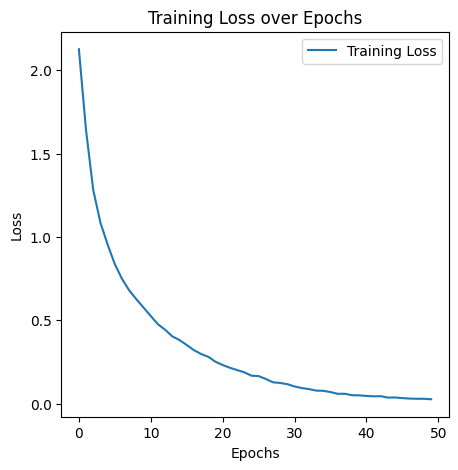

In [57]:
# Plotting training loss
plt.figure(figsize=(5, 5))
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()